In [1]:
# Deep Learning with Python Ch3: IMDb example
# import necessary libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras import models
from keras import layers

Using TensorFlow backend.


In [2]:
# load data: only keep top 10,000 most used words
# save np.load
np_load_old = np.load

# modify the default parameters of np.load: set allow_pickle to true
np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [3]:
# see the 1st review
word_index         = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review     = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
print(decoded_review)
print(train_labels[0])

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [4]:
# can't feed integers to a neural network, so create 0-1 tensor matrix 
def vectorize_sequences(sequences, dimension=10000):
    # row = # of data points, col = # of most used words
    results = np.zeros((len(sequences), dimension)) 
    # set value to 1 if the sequence-th word in the ith data pt is used
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 
    return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

# vectorize labels too
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [9]:
# build and compile network
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

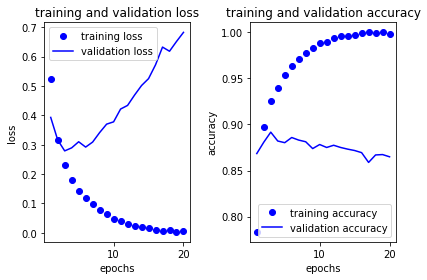

In [10]:
# validation approach
# set aside 10,000 samples from training data
x_val  = x_train[:10000]
x_part = x_train[10000:]
y_val  = y_train[:10000]
y_part = y_train[10000:]

# train network silently
history = model.fit(x_part, y_part, epochs=20, batch_size=512, 
                    validation_data=(x_val,y_val), verbose=0)

# plot losses and accuracies
history_dict = history.history
loss         = history_dict['loss']
val_loss     = history_dict['val_loss']
acc          = history_dict['acc']
val_acc      = history_dict['val_acc']
epochs       = range(1, len(loss)+1)

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# re-train network with # of epochs where min val_loss is located
# start fresh
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# re-train
best_epochs = np.argmin(val_loss)+1
model.fit(x_train, y_train, epochs=best_epochs, batch_size=512, verbose=0)

# apply network to test data
results = model.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 4s 150us/step
[0.29791679275512695, 0.87832]
